                   time    open    high      low    close   volume  \
0   2013-07-30 09:30:00  449.96  450.00  449.230  449.520   286139   
1   2013-07-30 09:31:00  449.52  449.86  449.320  449.455    51428   
2   2013-07-30 09:32:00  449.49  450.60  449.320  450.270   155051   
3   2013-07-30 09:33:00  450.29  451.00  450.170  450.210   122647   
4   2013-07-30 09:34:00  450.19  450.49  449.551  449.850    86533   
..                  ...     ...     ...      ...      ...      ...   
777 2013-07-31 15:56:00  452.05  454.20  451.860  452.490    56005   
778 2013-07-31 15:57:00  452.49  452.49  452.120  452.290    51673   
779 2013-07-31 15:58:00  452.29  452.69  452.240  452.470    65604   
780 2013-07-31 15:59:00  452.50  452.95  452.420  452.520   159435   
781 2013-07-31 16:00:00  452.52  452.52  452.500  452.500  1219076   

             TP            PV          TPV     Tvolu     VWAP  
0    449.583333  1.286433e+08  1.28643e+08    286139  449.583  
1    449.545000  2.311920e+07  

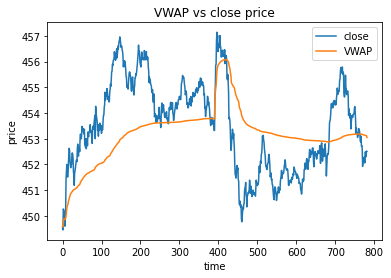

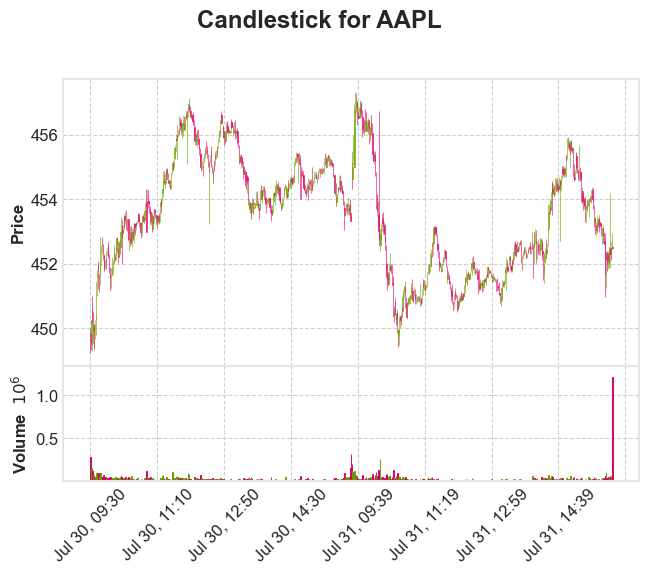

In [1]:
# Name: Tinghe Lou
# Email address:thlou@bu.edu
# Description: VWAP
# 
#
# 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
import mplfinance as mpf

df = pd.read_csv('AAPL_20130730_trades.csv')
df.DATE = df.DATE.astype(str)
date = df.DATE+' '+df.TIME
df['datetime'] = pd.to_datetime(date, format='%Y%m%d %H:%M:%S')

## exlude time outside normal trading hours
start30 = datetime.strptime('2013-07-30 09:30:00','%Y-%m-%d %H:%M:%S')
end30 = datetime.strptime('2013-07-30 16:00:00','%Y-%m-%d %H:%M:%S')
start31 = datetime.strptime('2013-07-31 09:30:00','%Y-%m-%d %H:%M:%S')
end31 = datetime.strptime('2013-07-31 16:00:00','%Y-%m-%d %H:%M:%S')
df = df.drop(df[(df.datetime < start30) | ((df.datetime > end30) & (df.datetime < start31)) | (df.datetime > end31)].index).reset_index(drop=True)
# print((df.datetime[22]-df.datetime[21]).seconds)

## On the way to VWAP
OPEN = []
HIGH = []
LOW = []
CLOSE = []
VOLUME = []
price = []
volume = []
ind = [df.datetime[0]]
p = df.datetime[0]
j = 0
for i in range(len(df)-1):
    diff = df.datetime[i+1]-p
    if diff.days==0 and diff.seconds<60:
        if price == []:
            price.append(df.PRICE[j])
            volume.append(df.SIZE[j])
        price.append(df.PRICE[i+1])
        volume.append(df.SIZE[i+1])
    else:
        j = i+1
        if p < datetime.strptime('2013-07-30 16:00:00','%Y-%m-%d %H:%M:%S'):
            p = pd.to_datetime((p+dt.timedelta(minutes=1)).strftime("%Y-%m-%d %H:%M:%S"))
        elif p == datetime.strptime('2013-07-30 16:00:00','%Y-%m-%d %H:%M:%S'):
            p = datetime.strptime('2013-07-31 9:30:00','%Y-%m-%d %H:%M:%S')
        else:
            p = pd.to_datetime((p+dt.timedelta(minutes=1)).strftime("%Y-%m-%d %H:%M:%S"))
        ind.append(p)
        OPEN.append(price[0])
        CLOSE.append(price[-1])
        HIGH.append(max(price))
        LOW.append(min(price))
        VOLUME.append(sum(volume))
        price = []
        volume = []

OPEN.append(price[0])
CLOSE.append(price[-1])
HIGH.append(max(price))
LOW.append(min(price))
VOLUME.append(sum(volume))

chart = pd.DataFrame(columns = ['time','open','high','low','close','volume',
                                'TP','PV','TPV','Tvolu','VWAP'])
chart['open'] = OPEN
chart['high'] = HIGH
chart['low'] = LOW
chart['close'] = CLOSE
chart['time'] = ind
chart['volume'] = VOLUME
chart['TP'] = (chart.high+chart.low+chart.close)/3
chart['PV'] = chart.volume*chart.TP
chart.loc[:391,'TPV'] = chart.PV[:391].cumsum()
chart.loc[391:,'TPV'] = chart.PV[391:].cumsum()
chart.loc[:391,'Tvolu'] = chart['volume'][:391].cumsum()
chart.loc[391:,'Tvolu'] = chart['volume'][391:].cumsum()
chart['VWAP'] = chart.TPV/chart.Tvolu
print(chart)

## Visualization
## VWAP vs close price
plt.plot(chart.close)
plt.plot(chart.VWAP)
plt.legend(['close','VWAP'])
plt.title('VWAP vs close price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()
## candlestick
chart = chart.set_index(['time'])
mpf.plot(chart.iloc[:,0:5], title="Candlestick for AAPL",type='candle',style="binance",volume=True)


